In [811]:
import numpy as np
import scipy.stats as stats
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [326]:
# county_adjac = pd.read_csv('county_adjacency.txt')

with open('county_adjacency.txt', 'rb') as f:
    string = ''
    for _ in f:
        string += f'{_}'
    
    nums_str = ''
    marked_string = string.replace("n'b'", "~")
    for char in marked_string:
        if char.isdigit() or char in '~':
            nums_str += char
    
    neighbor_list = []
    k = ''
    nums_list = nums_str.split('~')
    d = {}
    
    for num in nums_list:
        if len(num) == 10:
            d[k] = neighbor_list
            k = ''
            v = ''
            for nu in range(5):
                k += num[nu]
            for n in range(5, 10):
                v += num[n]
            neighbor_list = [v]
        if len(num) == 5:
            neighbor_list.append(num)
    d[k] = neighbor_list
    d.pop('')
            
#     x = f.read()
#     x

In [359]:
print(len(d))
# print(d)

3213


In [102]:
# neighbors=pd.DataFrame.from_dict(d,orient='index')
# neighbors = neighbors.reset_index()
# neighbors = neighbors.rename(columns={'index':'fips'})
# # neighbors.describe()
# print(neighbors.shape)
# neighbors.head()

In [260]:
# county_pop = pd.read_csv('covid_county_population_usafacts.csv')
# county_pop = county_pop[['countyFIPS', 'population']]
# print(county_pop.shape)

In [414]:
county_case = pd.read_csv('covid_confirmed_usafacts.csv')
case_cumul = county_case[['countyFIPS', '10/21/20']]
case_cumul = case_cumul.rename(columns={'countyFIPS':'fips'})
case_cumul = case_cumul.rename(columns={'10/21/20':'covid_cases'})
print(county_case.shape)
print(case_cumul.shape)

(3195, 278)
(3195, 2)


In [339]:
county_death = pd.read_csv('covid_deaths_usafacts.csv')
death_cumul = county_death[['countyFIPS', '10/21/20']]
death_cumul = death_cumul.rename(columns={'countyFIPS':'fips'})
death_cumul = death_cumul.rename(columns={'10/21/20':'covid_deaths'})
print(county_death.shape)
print(death_cumul.shape)

(3195, 278)
(3195, 2)


In [338]:
county_transpo = pd.read_csv('County_Transportation_Profiles.csv')
county_transpo = county_transpo.rename(columns={'County FIPS':'fips'})
print(county_transpo.shape)
# county_transpo.head()

(3142, 22)


In [560]:
tc = pd.merge(county_transpo, case_cumul, how = 'inner', on='fips')
tcd = pd.merge(tc, death_cumul, how = 'inner', on='fips')
tcd['fips'] = tcd['fips'].astype(str)
tcd['fips'] = tcd['fips'].str.zfill(5)

tcd = tcd.rename(columns={'State Name':'state','Primary and Commercial Airports':'com_airports',\
                         'Number of Bridges':'bridges','Number of business establishments':'businesses',\
                         'Percent of resident workers who commute by transit':'frac_transit_commuters',\
                         'Number of resident workers who work at home':'work_at_home',\
                         'Number of workers from other counties who commute to work in the county':'commute_in',\
                         'Number of resident workers who commute to work in other counties':'commute_out',\
                         'Number of resident workers who commute within county':'commute_within',\
                         'Number of resident workers':'resident_workers','Number of residents':'residents',\
                         'Total Marinas':'marinas','Total Docks':'docks',\
                         'Route miles of passenger railroad and rail transit':'miles_passenger_rail'})

tcd.set_index('fips', inplace=True)

print(tcd.shape)
print(tcd.columns)

(3142, 23)
Index(['County Name', 'State FIPS', 'state', 'com_airports',
       'Non-Commercial -Civil Public Use Airports and Seaplane base',
       'Non-Commercial -Other Aerodromes', 'bridges',
       '% of Poor Condition Bridges', 'businesses', 'frac_transit_commuters',
       'work_at_home', 'commute_in', 'commute_out', 'commute_within',
       'resident_workers', 'residents', 'docks', 'marinas',
       'Route miles of freight railroad',
       '% of Medium to Fair Condition Bridges', 'miles_passenger_rail',
       'covid_cases', 'covid_deaths'],
      dtype='object')


In [472]:
# tcd = tcd[tcd['fips'].isin(d2)]
tcd = tcd[tcd.index.isin(d2)]
print(tcd.shape)
print(len(d2))

(3137, 23)
3137


In [473]:
d2 = {}
val_list = []

for k,val in d.items():
    if tcd.index.isin([k]).any():
        for v in val:
            if v != k:
                val_list.append(v)
        d2[k] = val_list
        val_list = []
        
print(len(d2))
# print(d2)

3137


In [474]:
key_list = []
case_lst = []
death_ls = []
resid_ls = []

for k, val in d2.items():
#     print(f'k=:{k}')
    key_list.append(k)    
    case_count = 0
    death_count = 0
    resid_count = 0
    
    for v in val:
#         print(f'v=:{v}')
        if tcd.index.isin([v]).any():
            case_count = case_count + tcd.loc[v == tcd.index,['covid_cases']]['covid_cases'].values[0]
            death_count = death_count + tcd.loc[v == tcd.index,['covid_deaths']]['covid_deaths'].values[0]
            resid_count = resid_count + tcd.loc[v == tcd.index, ['residents']]['residents'].values[0]
            
#           print(f'\n{case_count}\n')

    case_lst.append(case_count)
    death_ls.append(death_count)
    resid_ls.append(resid_count)

In [475]:
print(len(key_list))
print(len(case_lst))
print(len(death_ls))
print(len(resid_ls))

print(key_list[-12:])
print(case_lst[-18:])
print(death_ls[-28:])
print(resid_ls[-15:])

3137
3137
3137
3137
['56023', '56025', '56027', '56029', '56031', '56033', '56035', '56037', '56039', '56041', '56043', '56045']
[1816, 3371, 2005, 1736, 2950, 10629, 6091, 1885, 1085, 5000, 2831, 2178, 2578, 3583, 9179, 2022, 3001, 5776]
[784, 155, 101, 109, 66, 62, 50, 11, 35, 16, 15, 23, 13, 25, 22, 218, 36, 26, 12, 31, 8, 45, 20, 24, 57, 5, 29, 55]
[78120, 193775, 667925, 222380, 87525, 60280, 212515, 164565, 83840, 126665, 158645, 328625, 104650, 175920, 213090]


In [476]:
n_cases_per_mil_ls = []
n_deaths_per_mil_ls = []
d3 = {}

for k, case, death, resid in zip(key_list, case_lst, death_ls, resid_ls):
    
    if resid == 0:
        n_cases_per_mil = 0
        n_deaths_per_mil = 0
    else:
        n_cases_per_mil = 1000000 * case / resid
        n_deaths_per_mil = 1000000 * death / resid
    
    d3[k] = [n_cases_per_mil, n_deaths_per_mil]
#     n_cases_per_mil_ls.append(n_cases_per_mil)
#     n_deaths_per_mil_ls.append(n_deaths_per_mil)

In [477]:
print(len(d3))
# print(len(n_cases_per_mil_ls))
# print(len(n_deaths_per_mil_ls))

# print(n_cases_per_mil_ls[-10:])
# print(n_deaths_per_mil_ls[-10:])

3137


In [478]:
# df['n_cases_per_mil_ls']['key_list'] = ____ to correspond to that ‘county_code’ index


df_neighb=pd.DataFrame.from_dict(d3,orient='index')
# df_neighb = df_neighb.reset_index()
df_neighb.rename(columns={0:'n_cases_per_mil',1:'n_deaths_per_mil'}, inplace=True)
print(df_neighb.describe())
print(df_neighb.shape)
df_neighb.head()

       n_cases_per_mil  n_deaths_per_mil
count      3137.000000       3137.000000
mean      26230.851914        516.755312
std       12052.130307        389.226528
min           0.000000          0.000000
25%       17752.141711        249.813338
50%       25141.859450        417.536534
75%       33753.607778        658.540191
max       78505.929820       2919.969620
(3137, 2)


,n_cases_per_mil,n_deaths_per_mil
01001,42894.964741,828.900161
01003,38415.690455,787.430191
01005,37884.631392,610.415915
01007,37923.341943,563.209237
01009,35763.150172,577.727239


In [643]:
tcdn = pd.merge(tcd, df_neighb, how = 'inner', left_index=True, right_index=True)
# tcdn.head()

In [644]:
df = tcdn[['state','residents','com_airports']].copy()
df['cases_per_mil'] = 1000000 * tcdn['covid_cases'] / tcdn['residents']
df['n_cases_per_mil'] = tcdn['n_cases_per_mil']
df['deaths_per_mil'] = 1000000 * tcdn['covid_deaths'] / tcdn['residents']
df['n_deaths_per_mil'] = tcdn['n_deaths_per_mil']
df['businesses_per_k'] = 1000 * tcdn['businesses'] / tcdn['residents']
df['frac_transit_commuters'] = tcdn['frac_transit_commuters']
df['frac_home_worker'] = tcdn['work_at_home'] / tcdn['residents']
df['frac_commute_in'] = tcd['commute_in'] / tcd['residents']
df['frac_commute_out'] = tcdn['commute_out'] / tcdn['residents']
df['frac_commute_within'] = tcd['commute_within'] / tcd['residents']

df['frac_workers'] = tcdn['resident_workers'] / tcdn['residents']
df['marinas'] = tcdn['marinas']
df['docks'] = tcdn['docks']
df['miles_passenger_rail'] = tcdn['miles_passenger_rail']

In [645]:
df.describe()

,residents,com_airports,cases_per_mil,n_cases_per_mil,deaths_per_mil,n_deaths_per_mil,businesses_per_k,frac_transit_commuters,frac_home_worker,frac_commute_in,frac_commute_out,frac_commute_within,frac_workers,marinas,docks,miles_passenger_rail
count,3.137000e+03,3012.000000,3137.000000,3137.000000,3137.000000,3137.000000,3135.000000,3137.000000,3134.000000,3137.000000,3137.000000,3137.000000,3137.000000,529.000000,529.000000,2683.000000
mean,1.011998e+05,0.146082,24562.069718,26230.851914,512.381042,516.755312,23.223055,0.009559,0.020900,0.147361,0.128174,0.281559,0.428782,0.011342,5.880907,10.135520
std,3.251810e+05,0.439545,15986.741331,12052.130307,566.824955,389.226528,9.452341,0.030918,0.015649,0.080671,0.078858,0.095255,0.064691,0.150328,11.427762,23.607214
min,7.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,4.233111,0.000000,0.000323,0.002024,0.000000,0.039810,0.132088,0.000000,0.000000,0.000000
25%,1.099500e+04,0.000000,13451.150938,17752.141711,127.795527,249.813338,17.323566,0.001140,0.011706,0.082168,0.064331,0.209816,0.385934,0.000000,1.000000,0.000000
50%,2.574500e+04,0.000000,21854.008061,25141.859450,338.696020,417.536534,21.604192,0.003396,0.017610,0.138671,0.116763,0.275202,0.432063,0.000000,2.000000,0.000000
75%,6.751000e+04,0.000000,32914.251524,33753.607778,692.817117,658.540191,27.240579,0.007817,0.025618,0.202243,0.182390,0.348924,0.474704,0.000000,6.000000,12.250000
max,1.005716e+07,8.000000,218820.577164,78505.929820,5031.446541,2919.969620,134.545455,0.617606,0.231293,0.464455,0.397472,0.743939,0.777778,3.000000,101.000000,431.500000


In [648]:
def split_col_h(df1,c):
    return df1[df1[c] >= df1[c].median()]   

def split_col_l(df1,c):
    return df1[df1[c] < df1[c].median()]

names_h = ['com_airports_h','n_cases_h','n_deaths_h','businesses_den_h',\
           'transit_commuters_h','home_worker_h','commute_in_h','commute_out_h',\
           'commute_within_h','workers_h','marinas_h','docks_h','rail_h']
names_l = ['com_airports_l','n_cases_l','n_deaths_l','businesses_den_l',\
           'transit_commuters_l','home_worker_l','commute_in_l','commute_out_l',\
           'commute_within_l','workers_l','marinas_l','docks_l','rail_l']
columns_ = ['com_airports','n_cases_per_mil','n_deaths_per_mil','businesses_per_k',\
            'frac_transit_commuters','frac_home_worker','frac_commute_in',\
           'frac_commute_out','frac_commute_within','frac_workers','marinas','docks',\
           'miles_passenger_rail']


In [660]:
d = {}

for nh, nl, c in zip(names_h, names_l, columns_):
    d[nh] = split_col_h(df,c)
    d[nl] = split_col_l(df,c)

In [662]:
# d['transit_commuters_h']
# split_col_h(df, 'frac_transit_commuters')

In [588]:
# new_df = pd.cut(df['frac_transit_commuters'], \
# [0,0.003396,0.617607], labels=None,  include_lowest=True)

# new_df.value_counts()

(-0.001, 0.0034]    1569
(0.0034, 0.618]     1568
Name: frac_transit_commuters, dtype: int64

In [958]:
# fig,ax = plt.subplots(figsize=(12,8))
# ax.set_title('Distribution of the Density of COVID Deaths')
# ax.set_xlabel('Deaths/Million People')
# ax.set_ylabel('County Count')
# fig.tight_layout
# ax.hist(df['deaths_per_mil'], bins=30, color='black')

In [1026]:
h_samp = d['docks_h']['deaths_per_mil']
l_samp = d['docks_l']['deaths_per_mil']

In [1027]:
def welch_test_statistic(h_sampl, l_sampl):
    h_sampl_mean = h_sampl.mean()
    l_sampl_mean = l_sampl.mean()
    h_sampl_var = h_sampl.var()
    l_sampl_var = l_sampl.var()
    
    numerator = h_sampl_mean - l_sampl_mean
    denominator_sq = h_sampl_var / len(h_sampl) + l_sampl_var / len(l_sampl)
    
    return numerator / np.sqrt(denominator_sq)

In [1028]:
test_statistic = welch_test_statistic(h_samp, l_samp)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: 1.40


In [1029]:
stats.ttest_ind(h_samp, l_samp, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=1.396432353411882, pvalue=0.16317219700157964)

But since the histogram doesnt' show a normal distribution, we don't want to use the Welch Test Statistic

In [1030]:
print(f'high mean: {h_samp.mean()}')
print(f'low mean: {l_samp.mean()}')

stats.mannwhitneyu(h_samp, l_samp, use_continuity=True, alternative=None)

high mean: 623.6135962279484
low mean: 550.9997047865394


MannwhitneyuResult(statistic=31702.0, pvalue=0.04572984681896093)

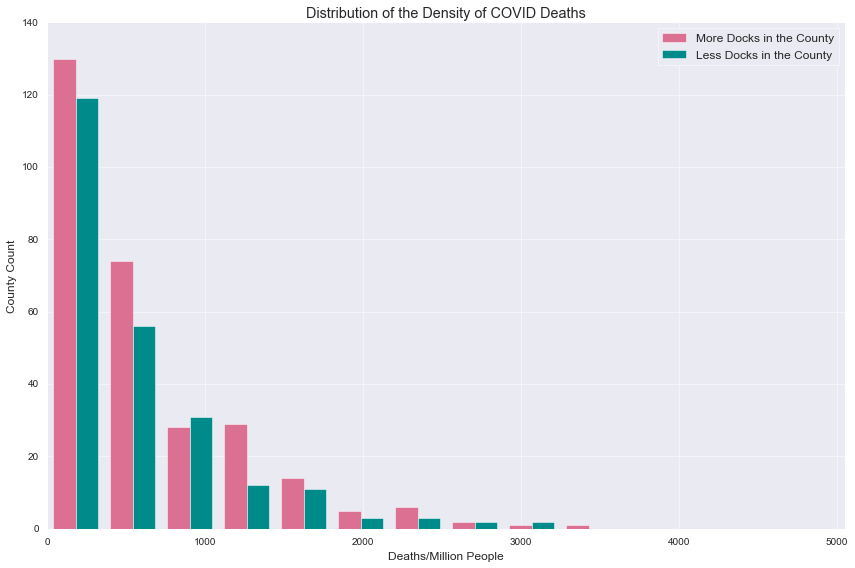

In [1031]:
bins = np.linspace(0, 5050, 15)

fig,ax = plt.subplots(figsize=(12,8))
ax.set_title('Distribution of the Density of COVID Deaths')
ax.set_xlabel('Deaths/Million People')
ax.set_ylabel('County Count')
ax.set_xlim(0,5050)

plt.hist([h_samp, l_samp], bins, label=['More Docks in the County', \
                                        'Less Docks in the County'],\
         color=['palevioletred', 'darkcyan'])
plt.legend(loc='upper right')

fig.tight_layout()
plt.show()

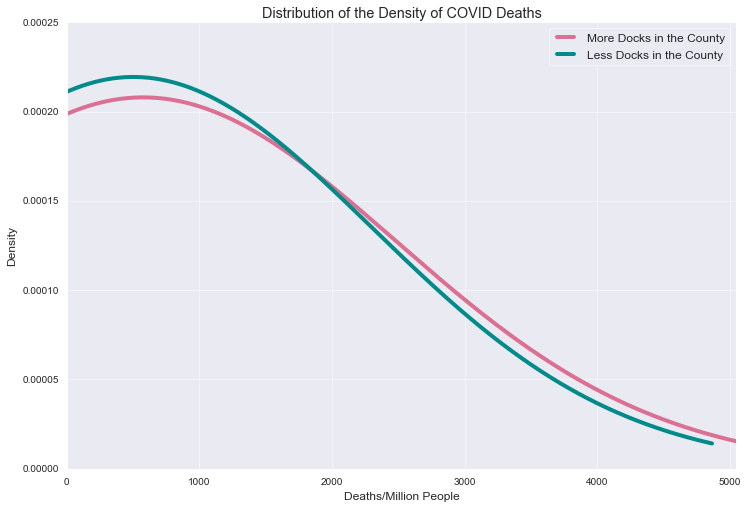

In [1032]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_title('Distribution of the Density of COVID Deaths')
ax.set_xlabel('Deaths/Million People')
ax.set_xlim(0,5050)

ax = h_samp.plot.kde(bw_method=3, color='palevioletred', linewidth=4, \
                     label='More Docks in the County')
ax = l_samp.plot.kde(bw_method=3, color='darkcyan', linewidth=4, \
                     label='Less Docks in the County')

plt.legend(loc='upper right')

In [1039]:
h_cases = 23247
l_cases = 25878
h_deaths= 508
l_deaths= 516

print(f'{h_cases -l_cases} case difference')
print(f'{100*h_cases/l_cases} case %')
print(f'{h_deaths -l_deaths} death difference')
print(f'{100*h_deaths/l_deaths} death %')

-2631 case difference
89.83306283329469 case %
-8 death difference
98.44961240310077 death %


In [542]:
state_df = df.groupby('state').mean()
state_df.sort_values('cases_per_mil', inplace=True, ascending=False)
# state_df.sort_values('deaths_per_mil', inplace=True, ascending=False)
state_df.head(10)

# (by='col1', ascending=False, na_position='first')

,residents,com_airports,cases_per_mil,n_cases_per_mil,deaths_per_mil,n_deaths_per_mil,businesses_per_k,%transit_commuters,%home_worker,%commute_in,%commute_out,%workers,marinas,docks,miles_passenger_rail
state,,,,,,,,,,,,,,,
Mississippi,36453.780488,0.088608,42046.635536,40882.370567,1352.882258,1220.792409,17.282610,0.004325,0.007737,0.151962,0.126391,0.366052,0.000000,3.266667,8.095588
Florida,297528.880597,0.287879,41659.309143,38588.084363,801.153318,763.966548,21.717755,0.010743,0.018227,0.113792,0.105818,0.379421,0.095238,7.714286,10.035000
Louisiana,72588.828125,0.109375,40979.939891,38334.530220,1264.353230,1169.370614,18.561908,0.005455,0.008752,0.151273,0.137814,0.388845,0.000000,15.343750,7.629091
North Dakota,13890.000000,0.153846,39371.152418,43961.431971,610.632398,619.133854,34.858687,0.003712,0.044069,0.110225,0.100667,0.496195,NaN,NaN,8.470000
Tennessee,68926.368421,0.070588,38889.184392,34341.278290,520.799225,468.451309,16.392765,0.002930,0.013745,0.163687,0.147583,0.395305,0.000000,2.272727,2.343836
Alabama,72255.895522,0.090909,38584.669904,37901.643419,769.923018,726.005701,17.310386,0.002732,0.009441,0.149890,0.124378,0.377880,0.000000,3.954545,4.342857
South Dakota,12873.923077,0.080645,38205.468067,38940.777302,401.337273,376.692809,31.194683,0.004597,0.046673,0.123339,0.107529,0.477183,NaN,NaN,0.210870
Georgia,63517.798742,0.050725,35063.473851,35709.320068,1071.278499,991.909094,17.470299,0.005519,0.014530,0.183531,0.167525,0.387871,0.000000,3.000000,2.190909
South Carolina,105100.000000,0.086957,34549.575530,34079.331786,950.564328,803.967034,18.220060,0.005557,0.012349,0.154973,0.131978,0.399817,0.000000,4.750000,12.215217


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff136fd4550>,
      dtype=object)

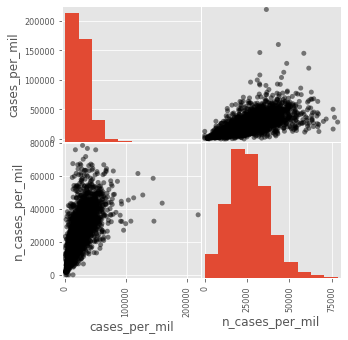

In [589]:
pd.plotting.scatter_matrix(df[['cases_per_mil','n_cases_per_mil']],\
                           figsize=(5,5),s=100,c='black')

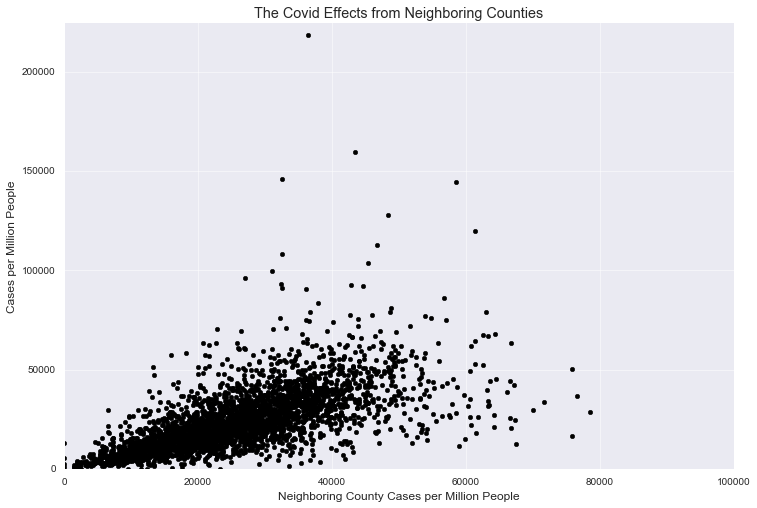

In [1048]:
# fig,ax = plt.subplots(figsize=(12,8))
# ax.set_title('The Covid Effects from Neighboring Counties')
# ax.set_xlabel('Neighboring County Cases per Million People')
# ax.set_ylabel('Cases per Million People')
# ax.set_xlim(0,100000)
# ax.set_ylim(0,225000)
# fig.tight_layout
# ax.scatter(df['n_cases_per_mil'],df['cases_per_mil'], color='black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff12874a9a0>,
      dtype=object)

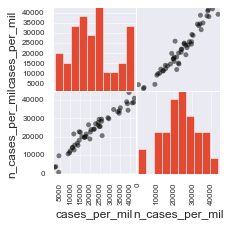

In [1041]:
pd.plotting.scatter_matrix(state_df[['cases_per_mil','n_cases_per_mil']],\
                           figsize=(3,3),s=100,c='black')

In [488]:
al = df[df['state']=='Alabama']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff13757e5b0>,
      dtype=object)

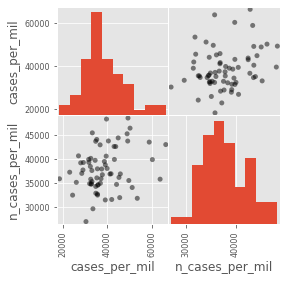

In [591]:
pd.plotting.scatter_matrix(al[['cases_per_mil','n_cases_per_mil']],\
                           figsize=(4,4),s=100,c='black')

In [490]:
ca = df[df['state']=='California']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1376e55e0>,
      dtype=object)

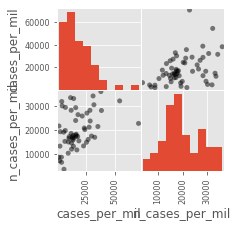

In [592]:
pd.plotting.scatter_matrix(ca[['cases_per_mil','n_cases_per_mil']],\
                           figsize=(3,3),s=100,c='black')

In [595]:
ga = df[df['state']=='Georgia']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff137dc4eb0>,
      dtype=object)

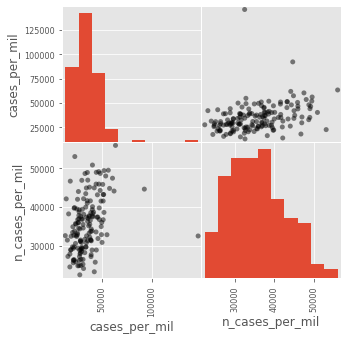

In [597]:
pd.plotting.scatter_matrix(ga[['cases_per_mil','n_cases_per_mil']],\
                           figsize=(5,5),s=100,c='black')

In [501]:
ny = df[df['state']=='New York']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff137fac3d0>,
      dtype=object)

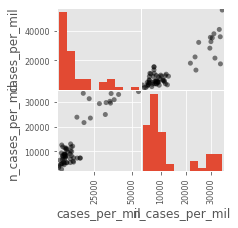

In [598]:
pd.plotting.scatter_matrix(ny[['cases_per_mil','n_cases_per_mil']],\
                           figsize=(3,3),s=100,c='black')

In [503]:
la = df[df['state']=='Louisiana']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff13824e2e0>,
      dtype=object)

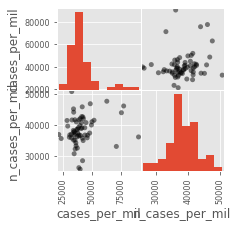

In [599]:
pd.plotting.scatter_matrix(la[['cases_per_mil','n_cases_per_mil']],\
                           figsize=(3,3),s=100,c='black')

In [505]:
fl = df[df['state']=='Florida']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff13840b400>,
      dtype=object)

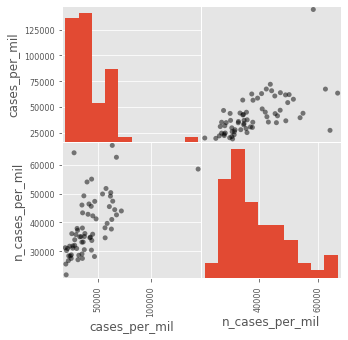

In [600]:
pd.plotting.scatter_matrix(fl[['cases_per_mil','n_cases_per_mil']],\
                           figsize=(5,5),s=100,c='black')

In [419]:
# tcd['fips'].isin(['02050']).any()
# tcd[tcd['fips']=='01021']
# print(tcd.loc[tcd['fips'] == k, ['fips','covid_cases','residents']])